In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from matplotlib.ticker import ScalarFormatter
import matplotlib.lines as mlines

%matplotlib inline

## scatterplot for the median rent

In [2]:
# Read the data from the CSV file
file_path = '../Data File Repository/Yearly_Median_Rent_DF.csv'
df = pd.read_csv(file_path)

In [3]:
df.columns = ['Borough'] + list(map(str, range(2010, 2024)))



In [4]:
# Convert values to float and remove $ signs
for year in df.columns[1:]:
    df[year] = df[year].replace('[\$,]', '', regex=True).astype(float)


In [5]:
borough_colors = {
    'Manhattan': 'red',
    'Brooklyn': 'blue',
    'Queens': 'green',
    'Bronx': 'purple',
    'Staten Island': 'orange'
}

In [6]:
# Check if there are any NaN values in the dataset
if df.iloc[:, 1:].isnull().values.any():
    # Handle NaN values using .loc
    df.iloc[:, 1:] = df.iloc[:, 1:].fillna(0)


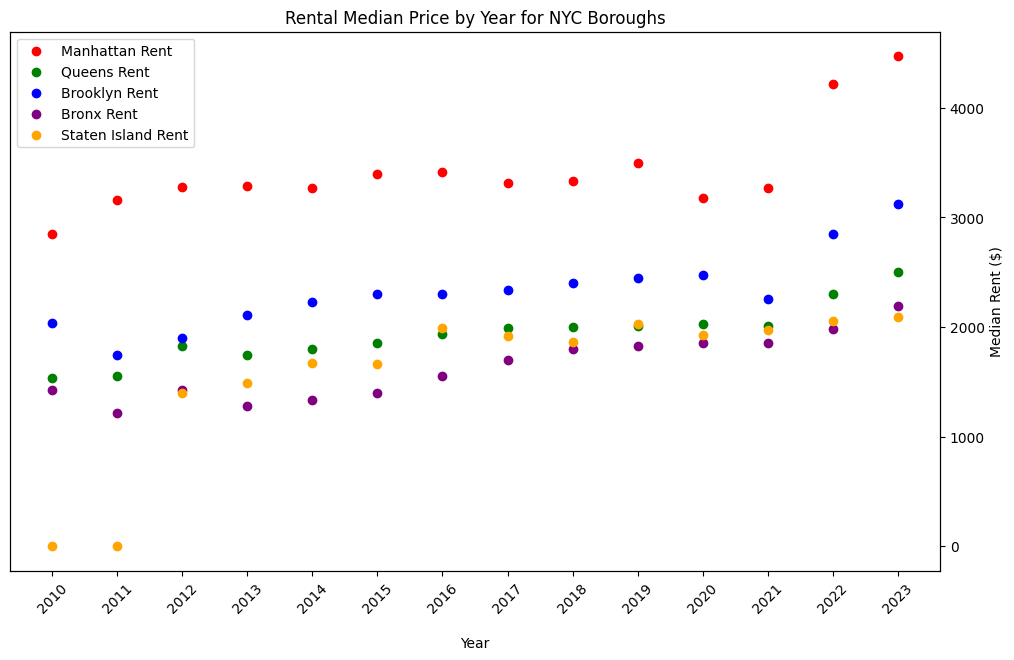

In [7]:
fig1, ax1 = plt.subplots(figsize=(12, 7))  # Increase the width

# Hide the ax1 y-axis as it's not being used
ax1.yaxis.set_visible(False)

# Move the Median Rent axis to the right
ax2 = ax1.twinx()  # Create a second y-axis that shares the same x-axis

for borough in df['Borough'].unique()[:5]: 
    borough_data = df[df['Borough'] == borough]
    years = borough_data.columns[1:]
    rents = borough_data.iloc[0, 1:]
    ax2.scatter(years, rents, label=f"{borough} Rent", color=borough_colors[borough], marker='o')

ax2.legend(loc="upper left")  # Position the legend on the upper left

# Set x-axis ticks and labels with rotation
ax1.set_xticks(range(len(years)))
ax1.set_xticklabels(years, rotation=45)

# Explicitly set the position of the x-axis label
ax1.set_xlabel('Year', labelpad=15)  # Adjust labelpad as needed

ax1.set_ylabel('Rental Inventory')
ax2.set_ylabel('Median Rent ($)')  # Explicitly set y-axis label for ax2
plt.title('Rental Median Price by Year for NYC Boroughs')
plt.legend()

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')

In [8]:
# Before showing the plot, save it to a file
output_directory = '../Charts and Graphs Output'
output_filename = 'median_rent_scatterplot.png'
output_path = os.path.join(output_directory, output_filename)


In [9]:
# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


In [10]:
# Save the figure using the fig reference
fig1.savefig(output_path, bbox_inches='tight')


In [11]:
plt.show()

## Starting scatter for the inventory

In [12]:
file_path_inventory = '../Data File Repository/Rental_Inventory_DF.csv'
df_inventory = pd.read_csv(file_path_inventory)



In [13]:
from matplotlib.ticker import ScalarFormatter


In [14]:
# Set the column names
df_inventory.columns = ['Borough'] + list(map(str, range(2010, 2024)))


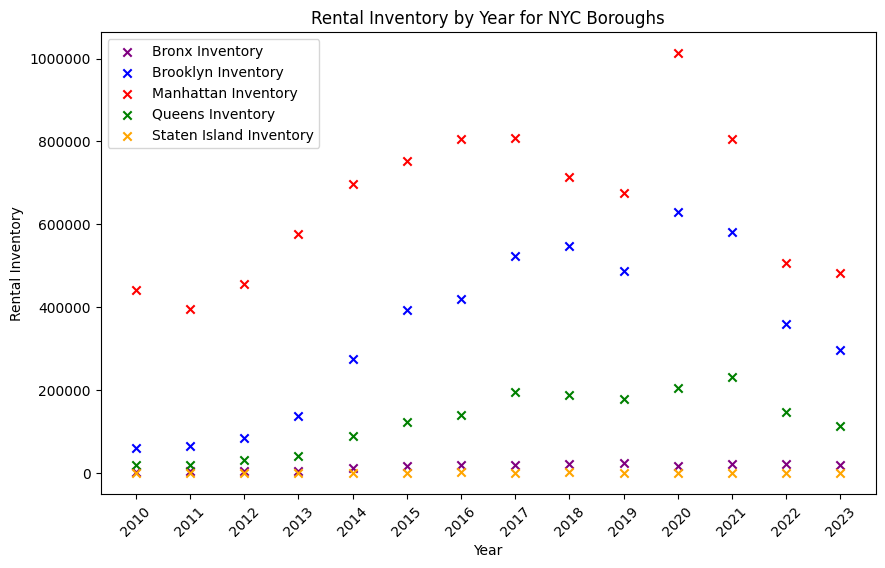

In [15]:
# Create the scatterplot for the Rental Inventory data
fig2 = plt.figure(figsize=(10, 6))

for borough in df_inventory['Borough'].unique():  
    borough_data = df_inventory[df_inventory['Borough'] == borough]
    years = borough_data.columns[1:]
    inventory = borough_data.iloc[0, 1:]
    plt.scatter(years, inventory, label=f"{borough} Inventory", color=borough_colors[borough], marker='x')

plt.xlabel('Year')
plt.ylabel('Rental Inventory')
plt.title('Rental Inventory by Year for NYC Boroughs')
plt.legend()
plt.xticks(rotation=45)

ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax.ticklabel_format(style='plain', axis='y')


In [16]:
# Save the scatterplot to a file
output_filename_inventory = 'rental_inventory_scatterplot.png'
output_path_inventory = os.path.join(output_directory, output_filename_inventory)


In [17]:
# Save the figure using the fig reference
fig2.savefig(output_path_inventory, bbox_inches='tight')


In [18]:
# Now you can display the plot
plt.show()

## combined scatterplot

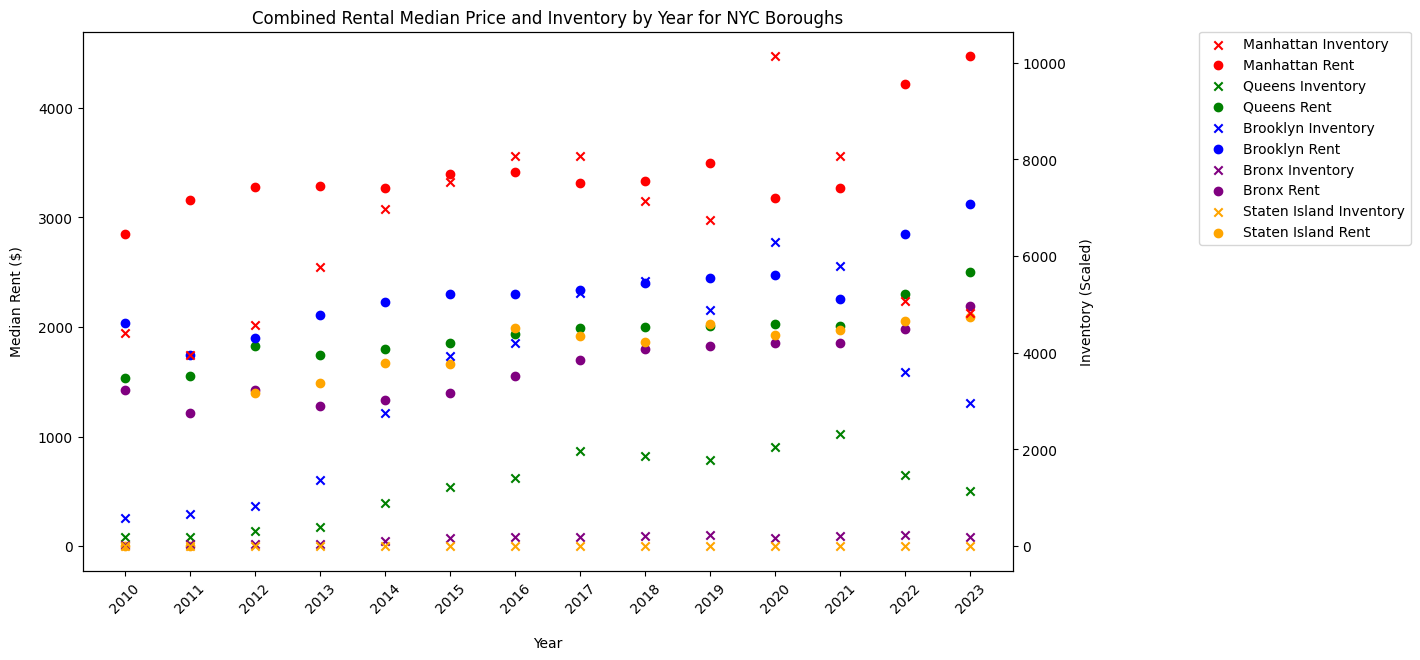

In [49]:
fig3, ax3 = plt.subplots(figsize=(12, 7))  # Increase the width

# Create a left y-axis that shares the same x-axis
ax4 = ax3.twinx()

legend_handles = []  # To store legend handles
legend_labels = []  # To store legend labels

for borough in df['Borough'].unique()[:5]: 
    borough_data_rent = df[df['Borough'] == borough]
    borough_data_inventory = df_inventory[df_inventory['Borough'] == borough]
    
    years = borough_data_rent.columns[1:]
    rents = borough_data_rent.iloc[0, 1:]
    inventory = borough_data_inventory.iloc[0, 1:] / 100  # Scale down the inventory values
    
    # Scatter plots on both y1 and y2 axes
    y2_plot = ax3.scatter(years, rents, label=f"{borough} Rent", color=borough_colors[borough], marker='o')
    y1_plot = ax4.scatter(years, inventory, label=f"{borough} Inventory", color=borough_colors[borough], marker='x')
    
    # Add handles and labels to the legend_handles and legend_labels lists
    legend_handles.extend([y1_plot, y2_plot])
    legend_labels.extend([f"{borough} Inventory", f"{borough} Rent"])

# Set x-axis ticks and labels with rotation
ax3.set_xticks(range(len(years)))
ax3.set_xticklabels(years, rotation=45)

# Explicitly set the position of the x-axis label
ax3.set_xlabel('Year', labelpad=15)  # Adjust labelpad as needed

# Set y1 label for inventory
ax4.set_ylabel('Inventory (Scaled)', labelpad=10)  # Adjust labelpad as needed

# Set y2 label for median rent
ax3.set_ylabel('Median Rent ($)', labelpad=10)

# Create a single legend for both y1 and y2
ax3.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(1.2, 1), borderaxespad=0.)

plt.title('Combined Rental Median Price and Inventory by Year for NYC Boroughs')

# Ensure that both y1 and y2 labels are visible
ax3.yaxis.set_visible(True)
ax4.yaxis.set_visible(True)

In [50]:
# Before showing the plot, save it to a file
output_filename_combined = 'combined_scatterplotV2.png'
output_path_combined = os.path.join(output_directory, output_filename_combined)


In [51]:
# Ensure the output directory exists
if not os.path.exists(output_directory):
    os.makedirs(output_directory)


In [52]:
# Save the figure using the fig reference
fig3.savefig(output_path_combined, bbox_inches='tight')


In [53]:
# Now you can display the combined scatterplot
plt.show()